# U.S. Flight Cancellation Analysis
## by Nicholas Holgate

## Investigation Overview

Flight cancellations are frustrating. They are an unfortunate risk to all air travel. But can you reduce the risk that your flight will be cancelled by choosing a specific carrier, location or time of travel?

Utilizing graphical techniques, an analysis has been conducted of all commercial 21st Century flights in the U.S. using the [The Bureau of Transportation Statistics](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) records from 2001 to 2007. The analysis has focussed on flight cancellations to elucidate potential answers to the above question, help inform the traveller prior to making their booking and perhaps encourage airlines and/or airports to improve their performance.

## Dataset Overview

The dataset consists of flight arrival and departure details for all commercial flights within the USA, from 2001 to 2007. This is a large dataset with nearly 47 million records in total and takes up almost 6 gigabytes of hard disk space. 

The original dataset has 29 columns. However, for the purpose of this analysis, to understand causes of flight cancellations, the dataset has been trimmed to only hold the year, month, day of week and scheduled departure time of flight, the airline, the departure airport, whether the flight was cancelled and the reason for cancellation including carrier, weather, National Aviation System or security.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sb
import os
pd.options.mode.chained_assignment = None

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
pdata = pd.read_csv('C:/Apps/dat/pdata.csv', delimiter=",", encoding='latin-1')

## Between 2001 and 2007, have the number of flights and flight cancellations increased?

The short answer is yes!

The graphs below indicate flights and flight cancellations, as well as the percentage of flights cancelled, have all increased between 2001 and 2007. The fact that the percentage of total flights that have been cancelled has increased indicates cancellation rates are increasing. 

There is an anomalous character to the start of the graphs in 2001 due to the 9/11 terror attacks. During this time, large numbers of flights were cancelled resulting in the disproportionately high cancellation rate seen. It also had an impact of 2002 data with the number of flights reducing significantly.

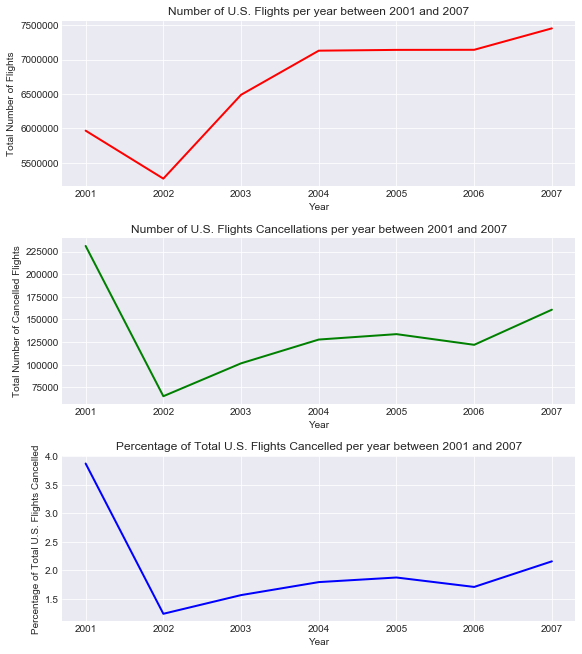

In [3]:
# create dataset from original
cn = pd.DataFrame()
cn = pdata[['Year','Cancelled']]

# calculate total number of flights, cancellations and the proportion of cancelled flights per year
yrcanc = cn.groupby('Year').count().rename(columns={'Cancelled':'Total_Flights'})
yrcanc['Cancellations'] = cn.groupby(['Year'])['Cancelled'].agg('sum')
yrcanc['Prop'] = (yrcanc['Cancellations'] / yrcanc['Total_Flights']) * 100

# plot subplot
plt.style.use('seaborn-darkgrid')
matplotlib.rcParams.update({'font.size': 10})
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3,figsize=(8,9))

yrcanc['Total_Flights'].plot(ax=ax1, legend=False, color='r', linewidth=2.0)
ax1.set(title='Number of U.S. Flights per year between 2001 and 2007', xlabel='Year', 
        ylabel='Total Number of Flights')

yrcanc['Cancellations'].plot(ax=ax2, legend=False, color='g', linewidth=2.0)
ax2.set(title='Number of U.S. Flights Cancellations per year between 2001 and 2007', xlabel='Year', 
        ylabel='Total Number of Cancelled Flights')

yrcanc['Prop'].plot(ax=ax3, legend=False, color='b', linewidth=2.0)
ax3.set(title='Percentage of Total U.S. Flights Cancelled per year between 2001 and 2007', xlabel='Year', 
        ylabel='Percentage of Total U.S. Flights Cancelled')

plt.tight_layout(pad=0.4)
plt.show()

## So, flight cancellations have increased overall, but is there a seasonality to them?

Yes, there does appear to be a seasonality to flight cancellations with the warmer colours in the heat maps indicating a greater percentage of flights cancelled. 

Winter months have a higher percentage of flight cancellations, although it is not the case for every winter month of a particular year. There is much more variability perhaps indicating time-specific events such as bad weather existing in one month one year but not in the next.

The day of week shows a slightly higher proportion of flight cancellations during the working week compared to the weekend. 

The hour of day has a relationship also with late afternoon indicating an increase in the proportion of flight cancellations scheduled to depart at that time of day. This may be a result of delays occurring in the morning causing greater impact in the afternoon. There also appears to be a spike early in the morning which may indicate aircraft out of position for the early morning departures.

Of note, September 2001 value is 20% of flights cancelled, probably due to the 9/11 terror attack. In the day of week heat map, it can also be identified that the 9/11 terror attack occurred on a Tuesday, with Wednesday having an equally high proportion of cancellations and then reducing advancing through the rest of the week.

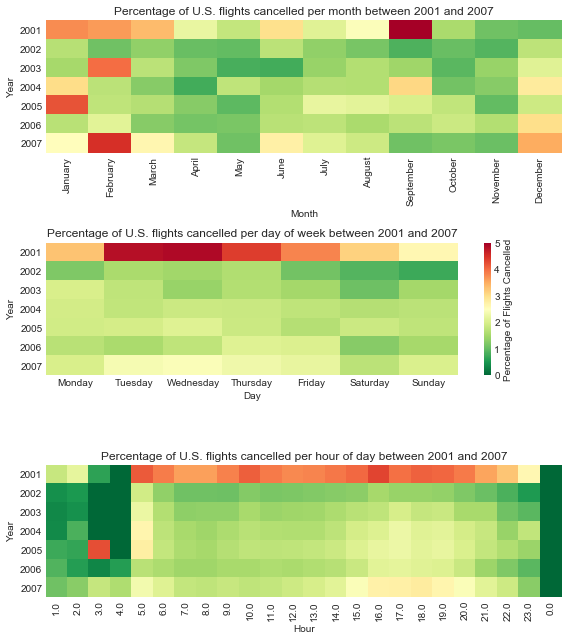

In [4]:
# calculate proportional flight cancellations per month of year
mntcan = pd.DataFrame()
mntcan = pdata[['Year','Month','Cancelled']]
mntcantot = mntcan.groupby(['Year','Month']).agg('sum').unstack()
mnttot = mntcan.groupby(['Year','Month']).agg('count').unstack()
mntcanprop = (mntcantot/mnttot)*100
mntcanprop.columns = mntcanprop.columns.droplevel(0)
mnew_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']
mntcanprop = mntcanprop[mnew_order]

# calculate proportional flight cancellations per day of week
daycan = pd.DataFrame()
daycan = pdata[['Year','Day','Cancelled']]
daycantot = daycan.groupby(['Year','Day']).agg('sum').unstack()
daytot = daycan.groupby(['Year','Day']).agg('count').unstack()
daycanprop = (daycantot/daytot)*100
daycanprop.columns = daycanprop.columns.droplevel(0)
dnew_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daycanprop = daycanprop[dnew_order]

# calculate proportional flight cancellations per hour of day
hcan = pd.DataFrame()
hcan = pdata[['Year','Hour','Cancelled']]
hcantot = hcan.groupby(['Year','Hour']).agg('sum').unstack()
htot = hcan.groupby(['Year','Hour']).agg('count').unstack()
hcanprop = (hcantot/htot)*100
hcanprop.columns = hcanprop.columns.droplevel(0)
hcanprop = hcanprop.fillna(0)
hcanprop = hcanprop.rename(columns={24.0: 0.0})

# plot results
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3,figsize=(8,9), gridspec_kw={'width_ratios': [1]})
sb.heatmap(mntcanprop, ax=ax1, vmin=0, vmax=5, annot=False, cmap="RdYlGn_r", cbar = False)
ax1.set_title('Percentage of U.S. flights cancelled per month between 2001 and 2007')
sb.heatmap(daycanprop, ax=ax2, vmin=0, vmax=5, annot=False, cmap="RdYlGn_r", 
           cbar_kws={'label': 'Percentage of Flights Cancelled'})
ax2.set_title('Percentage of U.S. flights cancelled per day of week between 2001 and 2007')
sb.heatmap(hcanprop, ax=ax3, vmin=0, vmax=5, annot=False, cmap="RdYlGn_r", cbar = False)
ax3.set_title('Percentage of U.S. flights cancelled per hour of day between 2001 and 2007')
fig.tight_layout()

## Which airports have a greater proportion of flight cancellations?

As perhaps would be expected, the larger airports in the U.S. also have the greater proportion of flight cancellations. 

Leading the pack, LaGuardia Airport has the highest proportions of cancellations of any airport in the U.S. The primary reason for these cancellations is weather closely followed by carrier.

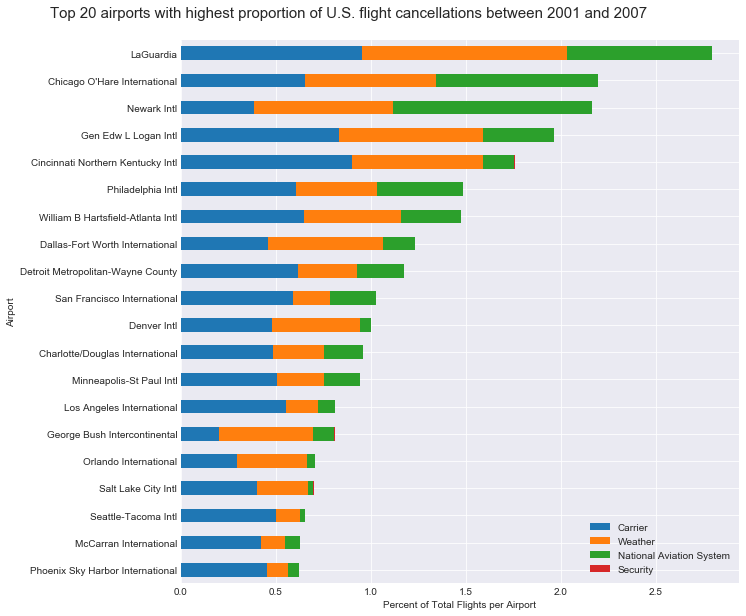

In [5]:
# create dataset from original
airpcanc = pd.DataFrame()
airpcanc[['airport','CancellationCode']] = pdata[['airport','CancellationCode']]
airpcancc = airpcanc.groupby(['airport', 'CancellationCode'])['CancellationCode'].count().unstack()
airpcancc = airpcancc.fillna(0)
airptot = airpcanc['airport'].value_counts().rename_axis('airport').to_frame('Flights')
airptota = airptot.merge(airpcancc, left_on='airport', right_on='airport')
airptota['Carrier_Prop'] = (airptota['Carrier'] / airptota['Flights'])*100
airptota['Weather_Prop'] = (airptota['Weather'] / airptota['Flights'])*100
airptota['NAS_Prop'] = (airptota['NAS'] / airptota['Flights'])*100
airptota['Security_Prop'] = (airptota['Security'] / airptota['Flights'])*100
airptota.drop(['Carrier','Weather','NAS','Security','Flights'], axis=1, inplace=True)
airptota['sum'] = airptota.apply(lambda row: row.Carrier_Prop + row.Weather_Prop + row.NAS_Prop + row.Security_Prop, axis=1)
airptota = airptota.iloc[:20]

# re-index to create size order to stacked bar chart
newindex = airptota.sort_values('sum', ascending=True).index
airptota = airptota.reindex(newindex)
airptota.drop('sum', axis=1, inplace=True)

# plot proportional stacked bar chart
airptota.plot.barh(stacked=True, figsize=(10, 10))
plt.legend(["Carrier", "Weather","National Aviation System","Security"]);
plt.title('Top 20 airports with highest proportion of U.S. flight cancellations between 2001 and 2007',
         fontsize=15, x=0.3, y=1.03)
plt.xlabel('Percent of Total Flights per Airport')
plt.ylabel('Airport')
plt.show()

## Which airlines have a greater proportion of carrier cancellations?

Atlantic Southeast Airlines cancel the greatest proportion of their flights compared to other U.S. airlines.

United Airlines have had the greatest growth in flight cancellations from 2003 to 2007 compared to other U.S. airlines.

Surprisingly, every airline in the dataset cancelled a greater proportion of their flights in 2007 compared to 2003, suggesting none are improving their cancellation rate. 

It should be noted that prior to 2003, cancellations were not divided into category in the dataset and hence why this analysis is restricted to between 2003 and 2007.

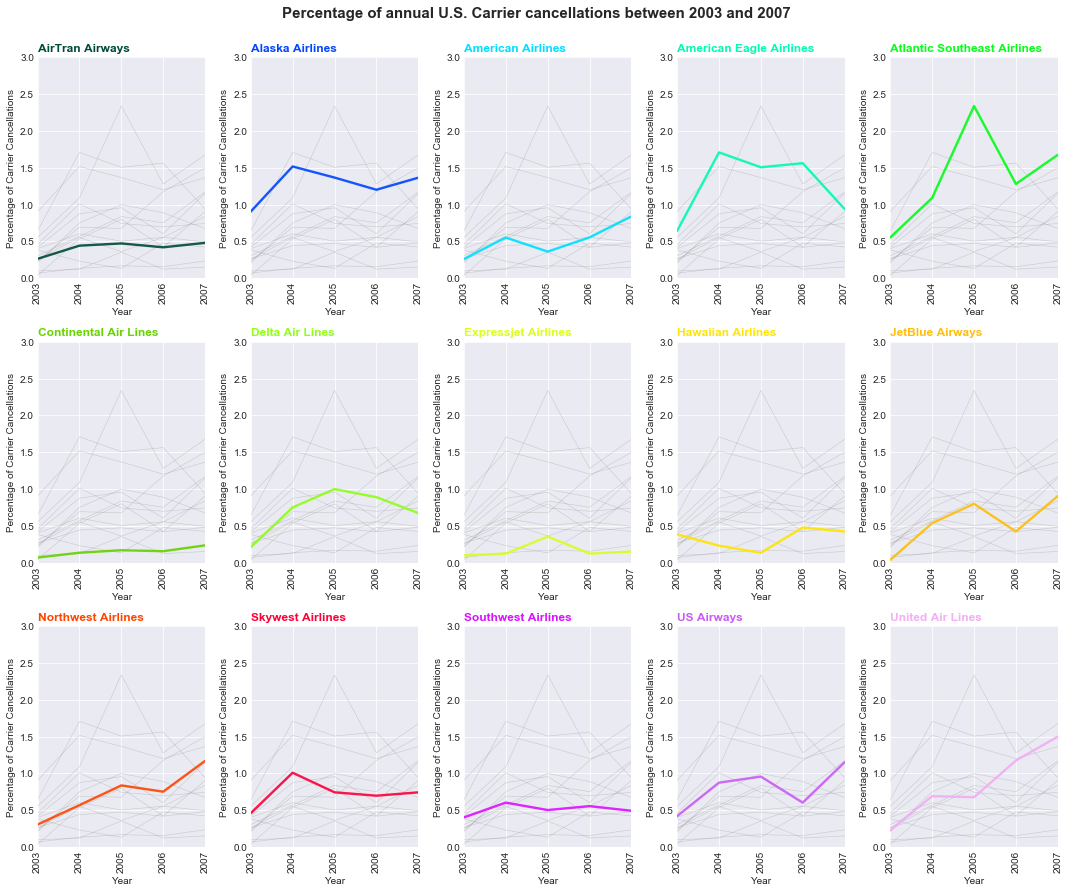

In [6]:
# sort data
cc = pd.DataFrame()
cc = pdata[['Year','Airline','CancellationCode']]
cc2 = cc.groupby(['Year','Airline']).size().unstack(fill_value=0)
cc2.drop('Trans World Airways LLC', axis=1, inplace=True)
cc2 = cc2.iloc[2:]
cc3 = cc[(cc['CancellationCode'] == 'Carrier')]
cc3 = cc3.groupby(['Year','Airline']).size().unstack(fill_value=0)
cc4 = pd.DataFrame()
cc4 = (cc3/cc2)*100
cc4 = cc4.dropna(axis=1)
cc4 = cc4.reset_index()
rep = 'Inc.', 'Corporation', 'Co.', '(Merged with America West 9/05. Reporting for both starting 10/07.)'
for re in rep:
    cc4 = cc4.rename(columns = lambda x: x.replace(re, ''))
    
# plot data
palette = plt.get_cmap('gist_ncar', 17)
fig = plt.figure(figsize=(15, 12))
num=0
for column in cc4.drop('Year', axis=1):
    num+=1
    plt.subplot(3,5,num)
    for v in cc4.drop('Year', axis=1):
        plt.plot(cc4['Year'], cc4[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    plt.plot(cc4['Year'], cc4[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    plt.xlim(2003,2007)
    plt.ylim(0,3)
    plt.title(column, loc='left', fontsize=12, fontweight='semibold', color=palette(num))
    plt.tick_params('x', labelrotation=90)
    plt.xlabel('Year')
    plt.ylabel('Percentage of Carrier Cancellations')
plt.suptitle("Percentage of annual U.S. Carrier cancellations between 2003 and 2007", fontsize=15, fontweight='semibold', y=1.03)
fig.tight_layout()
plt.show()

## Conclusions

- The number of flights and flight cancellations in the U.S. between 2001 and 2007 increased. Crucially, so had the percentage of flights cancelled suggesting the industry was not improving in this factor.
- Flight cancellations were more likely during Winter months, during the working week and in the early morning or late afternoon. 
- Major international airports had a higher proportion of flight cancellations with LaGuardia, Chicago O'Hare and Newark being the worse performing.
- All U.S. airlines had increased their percentage of flights cancelled between 2003 and 2007 with United Air Lines, Atlantic Southeast Airlines and JetBlue Airways having the greatest increases.